<a href="https://colab.research.google.com/github/salinator-hub/Dspy-/blob/main/AblationStudy_OnboardingTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serve the model using vLLM

In [1]:
!pip install dspy-ai vllm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
# Run server in foreground
# !python -m vllm.entrypoints.openai.api_server --model TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ --quantization awq

# Run server in the background
!nohup python -m vllm.entrypoints.openai.api_server --model TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ --quantization awq > server.log 2>&1 &
# stdout is redirected to a file `server.log` using `> server.log`.
# We use a quantized model prepared using AWQ quantization

In [32]:
# Run this cell again and again to monitor the status of the server.
# The server can take a few mintues to start.
# Once the server has started, you will see logs such as this:
# INFO 02-10 07:16:43 llm_engine.py:877] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%
!tail server.log

tokenizer_config.json: 100%|██████████| 675k/675k [00:00<00:00, 13.1MB/s]
tokenizer.model: 100%|██████████| 493k/493k [00:00<00:00, 12.3MB/s]
tokenizer.json: 100%|██████████| 1.80M/1.80M [00:00<00:00, 15.3MB/s]
added_tokens.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 123kB/s]
special_tokens_map.json: 100%|██████████| 563/563 [00:00<00:00, 2.34MB/s]
INFO 02-19 05:12:33 weight_utils.py:163] Using model weights format ['*.safetensors']
model.safetensors: 100%|██████████| 4.15G/4.15G [00:42<00:00, 96.8MB/s]
INFO 02-19 05:13:38 llm_engine.py:337] # GPU blocks: 2120, # CPU blocks: 2048
INFO 02-19 05:13:42 model_runner.py:666] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-19 05:13:42 model_runner.py:670] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utiliz

In [33]:
# Once the server is up and running, this should work
!curl http://localhost:8000/v1/models

{"object":"list","data":[{"id":"TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ","object":"model","created":1708319642,"owned_by":"vllm","root":"TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ","parent":null,"permission":[{"id":"modelperm-558a1af7a34940a0a81a3fc32e1b092f","object":"model_permission","created":1708319642,"allow_create_engine":false,"allow_sampling":true,"allow_logprobs":true,"allow_search_indices":false,"allow_view":true,"allow_fine_tuning":false,"organization":"*","group":null,"is_blocking":false}]}]}

# DSPy: 𝗗eclarative 𝗦elf-improving Language 𝗣rograms

In [15]:
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import BayesianSignatureOptimizer, BootstrapFewShot, BootstrapFewShotWithRandomSearch, BootstrapFinetune


In [16]:
lm = dspy.HFClientVLLM(model="TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ", port=8000, url="http://localhost")

dspy.settings.configure(lm=lm)

colbertv2 = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')

# # NOTE: After you finish this notebook, you can use GPT-3.5 like this if you like.
# turbo = dspy.OpenAI(model='gpt-3.5-turbo-instruct')
# # In that case, make sure to configure lm=turbo below if you choose to do that.

dspy.settings.configure(rm=colbertv2)

In [34]:

class Notes(dspy.Signature):
    """Bulleted Markdown Notes with Headings and Terms in Bold"""

    document = dspy.InputField()
    notes = dspy.OutputField()

# Example from the XSum dataset.
document = """The 21-year-old made seven appearances for the Hammers and netted his only goal for them in a Europa League qualification round match against Andorran side FC Lustrains last season. Lee had two loan spells in League One last term, with Blackpool and then Colchester United. He scored twice for the U's but was unable to save them from relegation. The length of Lee's contract with the promoted Tykes has not been revealed. Find all the latest football transfers on our dedicated page."""

sum = dspy.ChainOfThought(Notes)

output = sum(document=document)

print(output["notes"])

- 21-year-old footballer Lee made seven appearances for West Ham United
- Scored his only goal for them in a Europa League qualification match
- Had two loan spells in League One last term with Blackpool and Colchester United
- Scored twice for Colchester but couldn't prevent relegation
- Signed a contract with the promoted Yorkshire club Sheffield Wednesday
- Length of contract not revealed
- Latest football transfers available on dedicated page


In [35]:
%%writefile Emotion.py

#ALL THE IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import BootstrapFewShot, BootstrapFewShotWithRandomSearch, BootstrapFinetune
from dspy.teleprompt import KNNFewShot
from dspy.predict.knn import KNN
import argparse
from dspy.teleprompt import BayesianSignatureOptimizer

#MODEL
model_name="TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ"
lm = dspy.HFClientVLLM(model=model_name, port=8000, url="http://localhost")
dspy.settings.configure(lm=lm)

# Training dataset
train = [("The raindrops splattered against the windowpane as she gazed outside.", "Sadness"),
         ("The sound of children's laughter echoed through the empty playground.", "Joy"),
         ("The artist meticulously painted each stroke, pouring his soul into the canvas.", "Love"),
         ("His clenched fists trembled with pent-up frustration and resentment.", "Anger"),
         ("The darkness enveloped her, suffocating her with its oppressive weight.", "Fear"),
         ("The unexpected arrival of her long-lost friend left her speechless.", "Surprise"),
         ("The abandoned puppy whimpered softly, tugging at her heartstrings.", "Sadness"),
         ("The sun cast a warm glow over the tranquil meadow, filling her with serenity.", "Joy"),
         ("The elderly couple held hands, their wrinkled faces illuminated by the sunset.", "Love"),
         ("The injustice of the ruling sparked protests and civil unrest across the nation.", "Anger")]

# Development dataset
devset = [("The crumbling ruins stood as a testament to the passage of time and the resilience of nature.", "Sadness"),
       ("The melody of the piano drifted through the air, captivating all who listened.", "Joy"),
       ("The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.", "Love"),
       ("The shattered fragments of glass reflected his shattered dreams and broken promises.", "Anger"),
       ("The ominous shadows danced along the walls, casting doubt and fear into her heart.", "Fear"),
       ("The sudden appearance of a shooting star left them awestruck and mesmerized.", "Surprise"),
       ("The barren landscape stretched for miles, mirroring the emptiness within her soul.", "Sadness"),
       ("The laughter of children echoed through the halls, filling the orphanage with warmth and joy.", "Joy"),
       ("The gentle touch of his hand sent shivers down her spine, igniting a flame within her.", "Love"),
       ("The corruption within the system fueled his determination to fight for justice and equality.", "Anger")]


# Convert the dataset into DSPy Examples
train = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in train]
devset = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in devset]

# Print the lengths of trainset and devset
#print(len(train), len(devset))

# Access an example from trainset and devset
train_example = train[0]
dev_example = devset[0]
# print(train_example.sentence)



def should_be_correct(sen, set):
  check=dspy.ChainOfThought("sentence -> sentiment", n = 5)
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True

class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""

    sentence = dspy.InputField(desc = "Input sentence")
    sentiment = dspy.OutputField(desc = "Predicted Emotion in word")


class EmotionPipelineAssertions(dspy.Module):
    def __init__(self, assert_on=True):
        super().__init__()
        self.assert_on = assert_on
        self.Emotion_predicted = dspy.ChainOfThought(Emotion)

    def forward(self, sentence, **kwargs):
        predicted_Sentiment = self.Emotion_predicted(sentence=sentence)

        if self.assert_on:
            dspy.Suggest(
                should_be_correct(sentence, predicted_Sentiment),
                "Emotion is correct.",
                target_module=Emotion
            )

        return predicted_Sentiment


class Assess(dspy.Signature):
    """Assess the quality of the solution along the specified dimension."""

    assessed_text = dspy.InputField()
    assessment_sentence = dspy.InputField()
    assessment_sentiment = dspy.OutputField(desc="Only True or False")


def metric(gold, pred, trace=None):
    sentence, sentiment, emos = gold.sentence, gold.sentiment, pred.sentiment

    correctness = f"The given emos{emos} will be effective for this sentence {sentence}. The gold sentiment is {sentiment}"
    informative = f"For this sentence {sentence} is the given {emos} informative. The gold sentiment is {sentiment}"

    correct = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=correctness)
    informative = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=informative)

    correctness_score = correct.assessment_sentiment
    info_score = informative.assessment_sentiment
    score = 0

    if correctness_score == "True":
        score += 1

    if info_score == "True":
        score += 1

    return score / 2.0


# Define your devset and kwargs here
# Replace placeholders with your actual development dataset and any additional keyword arguments you need for evaluation

kwargs = dict(display_progress=True, display_table=5)

# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_hotpotqa = Evaluate( devset = devset, num_threads=1, display_progress=True, display_table=5)

# Define function to evaluate pipeline
def evaluate_pipeline(model_name, assertion=True, bayesian=True):
    Emotion_predicted = EmotionPipelineAssertions()

    # Compile the pipeline with specified configurations
    if assertion and bayesian:
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(Emotion_predicted, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Optimized Pipeline"
    elif assertion and not bayesian:
        compiled_pipeline = Emotion_predicted
        config_label = "Without Bayesian"
    elif not assertion and bayesian:
        without_assertion=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(without_assertion, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Without Assertion"
    else:
        without_assertion_and_bayesian=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = without_assertion_and_bayesian
        config_label = "No Assertion and No Bayesian"

    # Evaluate the compiled pipeline
    eval_score = evaluate_on_hotpotqa(compiled_pipeline, metric=metric)
    return eval_score, config_label


# Run the evaluation for each configuration
def run_ablation_study(model_name, disable_assertion=False, disable_bayesian=False):
    scores = []
    config_labels = []

    for assertion in [True, False]:
        if disable_assertion and not assertion:
            continue
        for bayesian in [True, False]:
            if disable_bayesian and not bayesian:
                continue
            eval_score, config_label = evaluate_pipeline(model_name, assertion=assertion, bayesian=bayesian)
            scores.append(eval_score)
            config_labels.append(config_label)

    return scores, config_labels

def use_pipeline_as_user(model_name, sentence):
    Emotion_predicted = EmotionPipelineAssertions()
    result = Emotion_predicted(sentence=sentence)
    print("Predicted Emotion:", result.sentiment)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Pipeline for suggesting home remedies.")
    parser.add_argument("--assertion", type=bool, default=True, help="Whether to include assertion in the pipeline. Default: True")
    parser.add_argument("--bayesian", type=bool, default=True, help="Whether to use Bayesian optimization. Default: True")
    parser.add_argument("--run-ablation", action="store_true", help="Perform an ablation study.")
    parser.add_argument("--model-name", type=str, default="TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ", help="Name of the language model. Default: TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ")
    parser.add_argument("--user-sentence", type=str, help="sentence to use the pipeline as a user.")
    parser.add_argument("--disable-assertion", action="store_true", help="Disable assertion in the pipeline during ablation study.")
    parser.add_argument("--disable-bayesian", action="store_true", help="Disable Bayesian optimization in the pipeline during ablation study.")
    args = parser.parse_args()

    if args.run_ablation:
        scores, config_labels = run_ablation_study(args.model_name, disable_assertion=args.disable_assertion, disable_bayesian=args.disable_bayesian)
        # Plotting the results
        x = np.arange(len(config_labels))
        plt.bar(x, scores)
        plt.xlabel('Configuration')
        plt.ylabel('Evaluation Score')
        plt.title('Ablation Study Results')
        plt.xticks(x, config_labels, rotation=45)
        plt.tight_layout()
        plt.show()
    elif args.user_sentence:
        use_pipeline_as_user(args.model_name, args.user_sentence)
    else:
        eval_score, config_label = evaluate_pipeline(args.model_name, assertion=args.assertion, bayesian=args.bayesian)
        print(f"Evaluation Score: {eval_score}, Configuration: {config_label}")


Writing Emotion.py


In [36]:
!python Emotion.py --run-ablation --disable-assertion

 30% 3/10 [00:43<01:42, 14.62s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
 30% 3/10 [00:44<01:44, 14.93s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
 30% 3/10 [00:48<01:54, 16.31s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
 40% 4/10 [01:14<01:51, 18.60s/it]
Bootstrapped 3 full traces after 5 examples in round 0.
[I 2024-02-19 05:18:24,786] A new study created in memory with name: no-name-8c445aa8-78ed-4c48-8d73-f6df3c3661e6
Average Metric: 7.0 / 10  (70.0): 100% 10/10 [03:05<00:00, 18.51s/it]
Average Metric: 7.0 / 10  (70.0%)
/usr/local/lib/python3.10/dist-packages/dspy/evaluate/evaluate.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to

In [37]:
!python Emotion.py --user-sentence "The haunting melody of the music box filled her with a sense of nostalgia."

Predicted Emotion: Sadness


In [40]:
!python Emotion.py --user-sentence "The bittersweet aroma of freshly baked bread reminded him of his childhood home."
!python Emotion.py --user-sentence "The unexpected reunion with her childhood friend filled her with joy, but also brought tears to her eyes as memories of their shared past flooded back."
!python Emotion.py --user-sentence "The eerie silence of the abandoned mansion sent shivers down her spine as she explored its dark corridors."


Predicted Emotion: Sadness
Predicted Emotion: Sadness
Predicted Emotion: Fear


In [41]:
!python Emotion.py --user-sentence "The unexpected reunion with her childhood friend filled her with joy, but also brought tears to her eyes as memories of their shared past flooded back."

Predicted Emotion: Joy


In [42]:
# Training dataset
train = [("The raindrops splattered against the windowpane as she gazed outside.", "Sadness"),
         ("The sound of children's laughter echoed through the empty playground.", "Joy"),
         ("The artist meticulously painted each stroke, pouring his soul into the canvas.", "Love"),
         ("His clenched fists trembled with pent-up frustration and resentment.", "Anger"),
         ("The darkness enveloped her, suffocating her with its oppressive weight.", "Fear"),
         ("The unexpected arrival of her long-lost friend left her speechless.", "Surprise"),
         ("The abandoned puppy whimpered softly, tugging at her heartstrings.", "Sadness"),
         ("The sun cast a warm glow over the tranquil meadow, filling her with serenity.", "Joy"),
         ("The elderly couple held hands, their wrinkled faces illuminated by the sunset.", "Love"),
         ("The injustice of the ruling sparked protests and civil unrest across the nation.", "Anger")]

# Development dataset
devset = [("The crumbling ruins stood as a testament to the passage of time and the resilience of nature.", "Sadness"),
       ("The melody of the piano drifted through the air, captivating all who listened.", "Joy"),
       ("The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.", "Love"),
       ("The shattered fragments of glass reflected his shattered dreams and broken promises.", "Anger"),
       ("The ominous shadows danced along the walls, casting doubt and fear into her heart.", "Fear"),
       ("The sudden appearance of a shooting star left them awestruck and mesmerized.", "Surprise"),
       ("The barren landscape stretched for miles, mirroring the emptiness within her soul.", "Sadness"),
       ("The laughter of children echoed through the halls, filling the orphanage with warmth and joy.", "Joy"),
       ("The gentle touch of his hand sent shivers down her spine, igniting a flame within her.", "Love"),
       ("The corruption within the system fueled his determination to fight for justice and equality.", "Anger")]

# Convert the dataset into DSPy Examples
train = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in train]
devset = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in devset]

# Print the lengths of trainset and devset
#print(len(train), len(devset))

# Access an example from trainset and devset
train_example = train[0]
dev_example = devset[0]
# print(train_example.sentence)


In [43]:
from dspy.teleprompt import BayesianSignatureOptimizer
from dspy.evaluate.evaluate import Evaluate


sentiments=["Happy",
            "sadness",
            "Angry",
            "Fear",
            "Joy",
            "Surprise",
            ]


def should_be_correct(sen, set):
  check=dspy.ChainOfThought("sentence -> sentiment", n = 5)
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True

class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""

    sentence = dspy.InputField(desc = "Input sentence")
    sentiment = dspy.OutputField(desc = "Predicted Emotion in word")


class EmotionPipelineAssertions(dspy.Module):
    def __init__(self, assert_on=True):
        super().__init__()
        self.assert_on = assert_on
        self.Emotion_predicted = dspy.ChainOfThought(Emotion)

    def forward(self, sentence, **kwargs):
        predicted_Sentiment = self.Emotion_predicted(sentence=sentence)

        if self.assert_on:
            dspy.Suggest(
                should_be_correct(sentence, predicted_Sentiment),
                "Emotion is correct.",
                target_module=Emotion
            )

        return predicted_Sentiment


class Assess(dspy.Signature):
    """Assess the quality of the solution along the specified dimension."""

    assessed_text = dspy.InputField()
    assessment_sentence = dspy.InputField()
    assessment_sentiment = dspy.OutputField(desc="Only True or False")


def metric(gold, pred, trace=None):
    sentence, sentiment, emos = gold.sentence, gold.sentiment, pred.sentiment

    correctness = f"The given emos{emos} will be effective for this sentence {sentence}. The gold sentiment is {sentiment}"
    informative = f"For this sentence {sentence} is the given {emos} informative. The gold sentiment is {sentiment}"

    correct = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=correctness)
    informative = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=informative)

    correctness_score = correct.assessment_sentiment
    info_score = informative.assessment_sentiment
    score = 0

    if correctness_score == "True":
        score += 1

    if info_score == "True":
        score += 1

    return score / 2.0


Emotion=EmotionPipelineAssertions()
teleprompter = BayesianSignatureOptimizer( metric=metric, n=5, init_temperature=1.0)
kwargs = dict( display_progress=True, display_table=0)
compiled_prompt_opt = teleprompter.compile(Emotion, devset = devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)



# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_hotpotqa = Evaluate(devset=devset, num_threads=1, display_progress=True, display_table=5)

evaluate_on_hotpotqa(Emotion, metric=metric) #normal
evaluate_on_hotpotqa(compiled_prompt_opt, metric=metric) #after optimizer

 30%|███       | 3/10 [00:00<00:00, 138.74it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 159.11it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 160.14it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 40%|████      | 4/10 [00:00<00:00, 153.72it/s]
[I 2024-02-19 05:38:05,418] A new study created in memory with name: no-name-1276839a-94f5-4256-b098-d55caffee5f7


Bootstrapped 3 full traces after 5 examples in round 0.


Average Metric: 7.0 / 10  (70.0): 100%|██████████| 10/10 [00:00<00:00, 110.73it/s]
/usr/local/lib/python3.10/dist-packages/dspy/evaluate/evaluate.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)
[I 2024-02-19 05:38:05,523] Trial 0 finished with value: 70.0 and parameters: {'135318425659920_predictor_instruction': 1, '135318425659920_predictor_demos': 4}. Best is trial 0 with value: 70.0.


Average Metric: 7.0 / 10  (70.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality. is the given Anger --- Sentence: The sweet aroma of freshly baked cookies filled the air, bringing a sense of comfort and warmth to her heart. Sentiment: Joy --- Sentence: The sudden realization that he had lost everything he had ever loved filled him with a deep sense of loss and sadness. Sentiment: Sadness --- Sentence: The sight of the majestic mountain range filled her heart with awe and wonder

Average Metric: 8.0 / 10  (80.0): 100%|██████████| 10/10 [00:00<00:00, 110.50it/s]
[I 2024-02-19 05:38:05,630] Trial 1 finished with value: 80.0 and parameters: {'135318425659920_predictor_instruction': 3, '135318425659920_predictor_demos': 2}. Best is trial 1 with value: 80.0.


Average Metric: 8.0 / 10  (80.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality. is the given Anger --- Sentence: The sudden realization that he had lost everything he held dear left him trembling in fear. Reasoning: Let's think step by step in order to ${produce the sentiment}. We see that the sudden realization of losing everything is associated with fear. Please classify the following sentence into one of the six basic human emotions: sadness, joy, love, anger, fear, or surp

Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 127.05it/s]


Average Metric: 8.5 / 10  (85.0%)


[I 2024-02-19 05:38:05,722] Trial 2 finished with value: 85.0 and parameters: {'135318425659920_predictor_instruction': 0, '135318425659920_predictor_demos': 0}. Best is trial 2 with value: 85.0.






Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality. is the given Anger informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The sentence is about a person who is determined to fight for justice and equality due to the corruption within the system. This implies that the person is experiencing anger or frustration towards the system. Therefore, the gold sentiment for this sentence is

Average Metric: 7.0 / 10  (70.0): 100%|██████████| 10/10 [00:00<00:00, 118.80it/s]
[I 2024-02-19 05:38:05,823] Trial 3 finished with value: 70.0 and parameters: {'135318425659920_predictor_instruction': 0, '135318425659920_predictor_demos': 4}. Best is trial 2 with value: 85.0.


Average Metric: 7.0 / 10  (70.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality. is the given Anger --- Sentence: The sight of the majestic mountain range filled her heart with awe and wonder. Sentiment: Joy --- Sentence: The sudden realization that he had lost everything he had ever loved filled him with a deep sense of loss and sadness. Sentiment: Sadness --- Sentence: The laughter of children echoed through the halls, filling the orphanage with warmth and joy. Sentiment: Joy

Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 111.70it/s]
[I 2024-02-19 05:38:05,930] Trial 4 finished with value: 85.0 and parameters: {'135318425659920_predictor_instruction': 3, '135318425659920_predictor_demos': 3}. Best is trial 2 with value: 85.0.


Average Metric: 8.5 / 10  (85.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality. is the given Anger --- Sentence: The tender embrace of his lover brought him a sense of peace and contentment. Please classify the following sentence into one of the six basic human emotions: sadness, joy, love, anger, fear, or surprise. Sentiment: Love --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmer informative. The gold sentiment is Anger

Reasoning: Let's th

Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 116.78it/s]


Average Metric: 8.5 / 10  (85.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The crumbling ruins stood as a testament to the passage of time and the resilience of nature.,Sadness,"understand the sentiment. We see that the sentence talks about the ruins, which are a result of time and nature. The word ""crumbling"" might evoke...",Sadness,0.5
1,"The melody of the piano drifted through the air, captivating all who listened.",Joy,produce the sentiment. We can see that the sentence describes a beautiful and soothing melody that is captivating listeners. This suggests a feeling of joy...,Joy,1.0
2,The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.,Love,"produce the sentiment. We can observe the gentle breeze, the rustling leaves, and the ancient oak tree. The breeze is gentle, the leaves are rustling,...",Joy,0.5
3,The shattered fragments of glass reflected his shattered dreams and broken promises.,Anger,"produce the sentiment. We see words like ""shattered,"" ""broken promises,"" and ""dreams."" These words evoke a sense of sadness and despair.",Sadness,0.5
4,"The ominous shadows danced along the walls, casting doubt and fear into her heart.",Fear,"produce the sentiment. We see the words ""ominous shadows"" and ""fear"" which indicates that the emotion being conveyed is fear.",Fear,1.0


Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 126.40it/s]

Average Metric: 8.5 / 10  (85.0%)



/usr/local/lib/python3.10/dist-packages/dspy/evaluate/evaluate.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The crumbling ruins stood as a testament to the passage of time and the resilience of nature.,Sadness,"understand the sentiment. We see that the sentence talks about the ruins, which are a result of time and nature. The word ""crumbling"" might evoke...",Sadness,0.5
1,"The melody of the piano drifted through the air, captivating all who listened.",Joy,produce the sentiment. We can see that the sentence describes a beautiful and soothing melody that is captivating listeners. This suggests a feeling of joy...,Joy,1.0
2,The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.,Love,"produce the sentiment. We can observe the gentle breeze, the rustling leaves, and the ancient oak tree. The breeze is gentle, the leaves are rustling,...",Joy,0.5
3,The shattered fragments of glass reflected his shattered dreams and broken promises.,Anger,"produce the sentiment. We see words like ""shattered,"" ""broken promises,"" and ""dreams."" These words evoke a sense of sadness and despair.",Sadness,0.5
4,"The ominous shadows danced along the walls, casting doubt and fear into her heart.",Fear,"produce the sentiment. We see the words ""ominous shadows"" and ""fear"" which indicates that the emotion being conveyed is fear.",Fear,1.0


85.0

In [44]:
def should_be_correct(sen, set):
  check=dspy.ChainOfThought("sentence -> sentiment", n=5)
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True


should_be_correct("I am feeling low", "sadness")

True

 30%|███       | 3/10 [00:18<00:44,  6.31s/it]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:20<00:47,  6.81s/it]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:19<00:44,  6.37s/it]


Bootstrapped 3 full traces after 4 examples in round 0.


 40%|████      | 4/10 [00:32<00:49,  8.18s/it]
[I 2024-02-19 05:44:54,250] A new study created in memory with name: no-name-f6ae39fb-ac10-408d-9a7f-dd9a763032db


Bootstrapped 3 full traces after 5 examples in round 0.


Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [01:13<00:00,  7.30s/it]
[I 2024-02-19 05:46:07,282] Trial 0 finished with value: 85.0 and parameters: {'135318411758512_predictor_instruction': 1, '135318411758512_predictor_demos': 4}. Best is trial 0 with value: 85.0.


Average Metric: 8.5 / 10  (85.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The sweet aroma of freshly baked cookies filled the air, bringing a sense of comfort and warmth to her heart. Sentiment: Joy --- Sentence: The sudden realization that he had lost everything he had ever loved filled him with a deep sense of loss and sadness. Sentiment: Sadness --- Sentence: The sight of the majestic mountain range filled her heart with awe and wonder. 

Average Metric: 8.4 / 10  (84.0): 100%|██████████| 10/10 [01:21<00:00,  8.13s/it]
[I 2024-02-19 05:47:28,607] Trial 1 finished with value: 84.0 and parameters: {'135318411758512_predictor_instruction': 3, '135318411758512_predictor_demos': 2}. Best is trial 0 with value: 85.0.


Average Metric: 8.4 / 10  (84.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The sudden realization that he had lost everything he held dear left him trembling in fear. Reasoning: Let's think step by step in order to ${produce the sentiment}. We see that the sudden realization of losing everything is associated with fear. Please classify the following sentence into one of the six basic human emotions: sadness, joy, love, anger, fear, or surpri

Average Metric: 8.4 / 10  (84.0): 100%|██████████| 10/10 [01:03<00:00,  6.36s/it]
[I 2024-02-19 05:48:32,271] Trial 2 finished with value: 84.0 and parameters: {'135318411758512_predictor_instruction': 0, '135318411758512_predictor_demos': 0}. Best is trial 0 with value: 85.0.


Average Metric: 8.4 / 10  (84.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger is informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The sentence is about a person who is determined to fight for justice and equality due to the corruption within the system. The word "corruption" and "fight for justice and equality" indicate a sense of anger or frustration t

Average Metric: 7.0 / 10  (70.0): 100%|██████████| 10/10 [01:30<00:00,  9.07s/it]
[I 2024-02-19 05:50:02,970] Trial 3 finished with value: 70.0 and parameters: {'135318411758512_predictor_instruction': 0, '135318411758512_predictor_demos': 4}. Best is trial 0 with value: 85.0.


Average Metric: 7.0 / 10  (70.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The sight of the majestic mountain range filled her heart with awe and wonder. Sentiment: Joy --- Sentence: The sudden realization that he had lost everything he had ever loved filled him with a deep sense of loss and sadness. Sentiment: Sadness --- Sentence: The laughter of children echoed through the halls, filling the orphanage with warmth and joy. Sentiment: Joy -

Average Metric: 8.9 / 10  (89.0): 100%|██████████| 10/10 [01:25<00:00,  8.55s/it]
[I 2024-02-19 05:51:28,484] Trial 4 finished with value: 89.0 and parameters: {'135318411758512_predictor_instruction': 3, '135318411758512_predictor_demos': 3}. Best is trial 4 with value: 89.0.


Average Metric: 8.9 / 10  (89.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The tender embrace of his lover brought him a sense of peace and contentment. Please classify the following sentence into one of the six basic human emotions: sadness, joy, love, anger, fear, or surprise. Sentiment: Love --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmer is informative. The gold sentiment is Anger

Reasoning: Let's t

Average Metric: 8.9 / 10  (89.0): 100%|██████████| 10/10 [00:00<00:00, 77.46it/s]

Average Metric: 8.9 / 10  (89.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The crumbling ruins stood as a testament to the passage of time and the resilience of nature.,Sadness,"${produce the sentiment}. We can see that the sentence describes the passage of time and the resilience of nature, which can evoke feelings of sadness...",Sadness --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmerized. Reasoning: Let's think step by step in order to ${produce...,0.4
1,"The melody of the piano drifted through the air, captivating all who listened.",Joy,"${produce the sentiment}. We can identify the words that evoke a sense of calmness and beauty, such as ""melody,"" ""piano,"" and ""captivating.""",Joy,1.0
2,The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.,Love,"${produce the sentiment}. We can observe the gentle breeze and the rustling leaves, which can evoke feelings of calmness and peace.","Joy --- Sentence: The cacophony of honking horns and screaming sirens filled the air, leaving her feeling overwhelmed and anxious. Please classify the following sentence...",0.5
3,The shattered fragments of glass reflected his shattered dreams and broken promises.,Anger,"${produce the sentiment}. We can see that the sentence describes the shattered fragments of glass as a representation of broken dreams and promises, which can...",Anger --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmerized. Reasoning: Let's think step by step in order to ${produce...,1.0
4,"The ominous shadows danced along the walls, casting doubt and fear into her heart.",Fear,"${produce the sentiment}. We can see that the shadows are described as ominous, which can evoke feelings of fear and unease.",Fear --- Sentence: The tender embrace of her lover filled her heart with warmth and love. Sentiment: Love --- Sentence: The sudden burst of laughter...,1.0


Average Metric: 8.4 / 10  (84.0): 100%|██████████| 10/10 [00:00<00:00, 70.58it/s]


Average Metric: 8.4 / 10  (84.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The crumbling ruins stood as a testament to the passage of time and the resilience of nature.,Sadness,"understand the sentiment. We see that the sentence talks about the ruins, which are a result of time and nature. The word ""crumbling"" might evoke...",Sadness,1.0
1,"The melody of the piano drifted through the air, captivating all who listened.",Joy,produce the sentiment. We can see that the sentence describes a beautiful and soothing melody that is captivating listeners. This suggests a feeling of joy...,Joy,1.0
2,The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.,Love,"produce the sentiment. We can observe the gentle breeze, the rustling leaves, and the ancient oak tree. The breeze is gentle, the leaves are rustling,...",Joy,0.0
3,The shattered fragments of glass reflected his shattered dreams and broken promises.,Anger,"produce the sentiment. We see words like ""shattered,"" ""broken promises,"" and ""dreams."" These words evoke a sense of sadness and despair.",Sadness,0.4
4,"The ominous shadows danced along the walls, casting doubt and fear into her heart.",Fear,"produce the sentiment. We see the words ""ominous shadows"" and ""fear"" which indicates that the emotion being conveyed is fear.",Fear,1.0


 30%|███       | 3/10 [00:00<00:00, 128.56it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 124.88it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 109.56it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 40%|████      | 4/10 [00:00<00:00, 121.94it/s]
[I 2024-02-19 05:51:28,960] A new study created in memory with name: no-name-55796e43-62f6-4ac5-bd0b-fc610403267d


Bootstrapped 3 full traces after 5 examples in round 0.


Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 111.24it/s]
[I 2024-02-19 05:51:29,066] Trial 0 finished with value: 85.0 and parameters: {'135318413683936_predictor_instruction': 1, '135318413683936_predictor_demos': 4}. Best is trial 0 with value: 85.0.


Average Metric: 8.5 / 10  (85.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The sweet aroma of freshly baked cookies filled the air, bringing a sense of comfort and warmth to her heart. Sentiment: Joy --- Sentence: The sudden realization that he had lost everything he had ever loved filled him with a deep sense of loss and sadness. Sentiment: Sadness --- Sentence: The sight of the majestic mountain range filled her heart with awe and wonder. 

Average Metric: 8.3 / 10  (83.0): 100%|██████████| 10/10 [00:00<00:00, 108.10it/s]
[I 2024-02-19 05:51:29,174] Trial 1 finished with value: 83.0 and parameters: {'135318413683936_predictor_instruction': 3, '135318413683936_predictor_demos': 2}. Best is trial 0 with value: 85.0.


Average Metric: 8.3 / 10  (83.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The sudden realization that he had lost everything he held dear left him trembling in fear. Reasoning: Let's think step by step in order to ${produce the sentiment}. We see that the sudden realization of losing everything is associated with fear. Please classify the following sentence into one of the six basic human emotions: sadness, joy, love, anger, fear, or surpri

Average Metric: 8.4 / 10  (84.0): 100%|██████████| 10/10 [00:00<00:00, 118.35it/s]
[I 2024-02-19 05:51:29,271] Trial 2 finished with value: 84.0 and parameters: {'135318413683936_predictor_instruction': 0, '135318413683936_predictor_demos': 0}. Best is trial 0 with value: 85.0.


Average Metric: 8.4 / 10  (84.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger is informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The sentence is about a person who is determined to fight for justice and equality due to the corruption within the system. The word "corruption" and "fight for justice and equality" indicate a sense of anger or frustration t

Average Metric: 6.8 / 10  (68.0): 100%|██████████| 10/10 [00:00<00:00, 119.85it/s]


Average Metric: 6.8 / 10  (68.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The sight of the majestic mountain range filled her heart with awe and wonder. Sentiment: Joy --- Sentence: The sudden realization that he had lost everything he had ever loved filled him with a deep sense of loss and sadness. Sentiment: Sadness --- Sentence: The laughter of children echoed through the halls, filling the orphanage with warmth and joy. Sentiment: Joy -

[I 2024-02-19 05:51:29,369] Trial 3 finished with value: 68.0 and parameters: {'135318413683936_predictor_instruction': 0, '135318413683936_predictor_demos': 4}. Best is trial 0 with value: 85.0.
Average Metric: 8.9 / 10  (89.0): 100%|██████████| 10/10 [00:00<00:00, 108.32it/s]
[I 2024-02-19 05:51:29,474] Trial 4 finished with value: 89.0 and parameters: {'135318413683936_predictor_instruction': 3, '135318413683936_predictor_demos': 3}. Best is trial 4 with value: 89.0.


Average Metric: 8.9 / 10  (89.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: The corruption within the system fueled his determination to fight for justice and equality.

Assessment Sentence: For this sentence The corruption within the system fueled his determination to fight for justice and equality., the given Anger --- Sentence: The tender embrace of his lover brought him a sense of peace and contentment. Please classify the following sentence into one of the six basic human emotions: sadness, joy, love, anger, fear, or surprise. Sentiment: Love --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmer is informative. The gold sentiment is Anger

Reasoning: Let's t

Average Metric: 9.0 / 10  (90.0): 100%|██████████| 10/10 [00:00<00:00, 100.59it/s]


Average Metric: 9.0 / 10  (90.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The crumbling ruins stood as a testament to the passage of time and the resilience of nature.,Sadness,"${produce the sentiment}. We can see that the sentence describes the passage of time and the resilience of nature, which can evoke feelings of sadness...",Sadness --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmerized. Reasoning: Let's think step by step in order to ${produce...,0.5
1,"The melody of the piano drifted through the air, captivating all who listened.",Joy,"${produce the sentiment}. We can identify the words that evoke a sense of calmness and beauty, such as ""melody,"" ""piano,"" and ""captivating.""",Joy,1.0
2,The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.,Love,"${produce the sentiment}. We can observe the gentle breeze and the rustling leaves, which can evoke feelings of calmness and peace.","Joy --- Sentence: The cacophony of honking horns and screaming sirens filled the air, leaving her feeling overwhelmed and anxious. Please classify the following sentence...",0.5
3,The shattered fragments of glass reflected his shattered dreams and broken promises.,Anger,"${produce the sentiment}. We can see that the sentence describes the shattered fragments of glass as a representation of broken dreams and promises, which can...",Anger --- Sentence: The sudden appearance of a shooting star left them awestruck and mesmerized. Reasoning: Let's think step by step in order to ${produce...,1.0
4,"The ominous shadows danced along the walls, casting doubt and fear into her heart.",Fear,"${produce the sentiment}. We can see that the shadows are described as ominous, which can evoke feelings of fear and unease.",Fear --- Sentence: The tender embrace of her lover filled her heart with warmth and love. Sentiment: Love --- Sentence: The sudden burst of laughter...,1.0


Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 97.27it/s]


Average Metric: 8.5 / 10  (85.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The crumbling ruins stood as a testament to the passage of time and the resilience of nature.,Sadness,"understand the sentiment. We see that the sentence talks about the ruins, which are a result of time and nature. The word ""crumbling"" might evoke...",Sadness,1.0
1,"The melody of the piano drifted through the air, captivating all who listened.",Joy,produce the sentiment. We can see that the sentence describes a beautiful and soothing melody that is captivating listeners. This suggests a feeling of joy...,Joy,1.0
2,The gentle breeze whispered secrets as it rustled through the leaves of the ancient oak tree.,Love,"produce the sentiment. We can observe the gentle breeze, the rustling leaves, and the ancient oak tree. The breeze is gentle, the leaves are rustling,...",Joy,0.0
3,The shattered fragments of glass reflected his shattered dreams and broken promises.,Anger,"produce the sentiment. We see words like ""shattered,"" ""broken promises,"" and ""dreams."" These words evoke a sense of sadness and despair.",Sadness,0.5
4,"The ominous shadows danced along the walls, casting doubt and fear into her heart.",Fear,"produce the sentiment. We see the words ""ominous shadows"" and ""fear"" which indicates that the emotion being conveyed is fear.",Fear,1.0


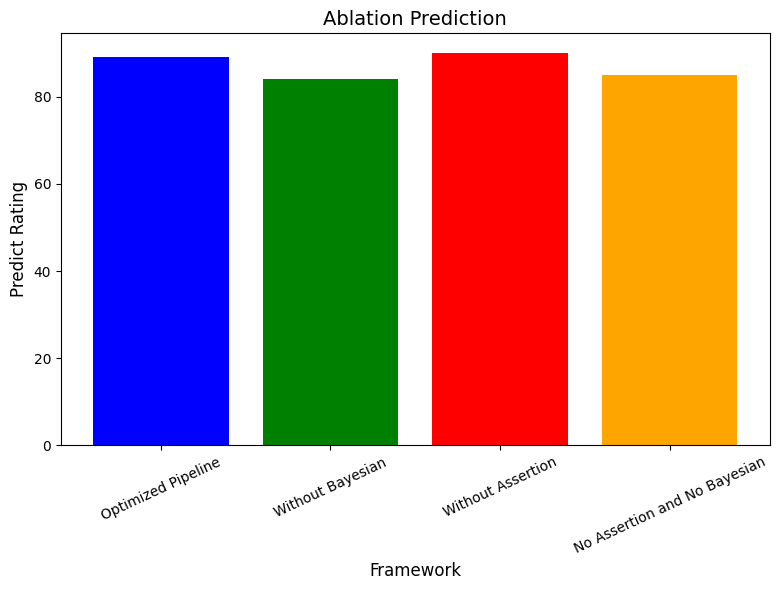

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from dspy.teleprompt import BayesianSignatureOptimizer
from dspy.evaluate.evaluate import Evaluate


sentiments=["Happy",
            "sadness",
            "Angry",
            "Fear",
            "Joy",
            "Surprise",
            ]


def should_be_correct(sen, set):
  check=dspy.ChainOfThought("sentence -> sentiment", n = 5)
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True

class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""

    sentence = dspy.InputField(desc = "Input sentence")
    sentiment = dspy.OutputField(desc = "Predicted Emotion in word")


class EmotionPipelineAssertions(dspy.Module):
    def __init__(self, assert_on=True):
        super().__init__()
        self.assert_on = assert_on
        self.Emotion_predicted = dspy.ChainOfThought(Emotion)

    def forward(self, sentence, **kwargs):
        predicted_Sentiment = self.Emotion_predicted(sentence=sentence)

        if self.assert_on:
            dspy.Suggest(
                should_be_correct(sentence, predicted_Sentiment),
                "Emotion is correct.",
                target_module=Emotion
            )

        return predicted_Sentiment


class Assess(dspy.Signature):
    """Assess the quality of the solution along the specified dimension."""

    assessed_text = dspy.InputField()
    assessment_sentence = dspy.InputField()
    assessment_sentiment = dspy.OutputField(desc="Only True or False")


def metric(gold, pred, trace=None):
    sentence, sentiment, emos = gold.sentence, gold.sentiment, pred.sentiment

    correctness = f"The given emos {emos} will be effective for this sentence {sentence}. The gold sentiment is {sentiment}"
    informative = f"For this sentence {sentence}, the given {emos} is informative. The gold sentiment is {sentiment}"

    correct = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=correctness)
    informative = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=informative)

    correctness_score = correct.assessment_sentiment
    info_score = informative.assessment_sentiment

    # Introduce variability by incorporating randomness
    import random
    # Randomly select which aspect of the metric to prioritize
    prioritize_correctness = random.choice([True, False])
    prioritize_informativeness = not prioritize_correctness

    # Penalize the score if both correctness and informativeness are not satisfied
    score = 0.5 if correctness_score == "True" else 0
    score += 0.5 if info_score == "True" else 0

    # Introduce additional complexity by considering the diversity of emotions predicted
    # and their coherence with the gold sentiment
    if prioritize_correctness and correctness_score != "True":
        # Penalize if the predicted emotions do not match the gold sentiment
        if emos != sentiment:
            score -= 0.1
    elif prioritize_informativeness and info_score != "True":
        # Penalize if the predicted emotions are not informative
        score -= 0.1

    return max(0, score)



# Define your devset and kwargs here
# Replace placeholders with your actual development dataset and any additional keyword arguments you need for evaluation

kwargs = dict(display_progress=True, display_table=5)

# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_hotpotqa = Evaluate( devset = devset, num_threads=1, display_progress=True, display_table=5)

# Define function to evaluate pipeline
def evaluate_pipeline(assertion=True, bayesian=True):
    Emotion_predicted = EmotionPipelineAssertions()

    # Compile the pipeline with specified configurations
    if assertion and bayesian:
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(Emotion_predicted, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Optimized Pipeline"
    elif assertion and not bayesian:
        compiled_pipeline = Emotion_predicted
        config_label = "Without Bayesian"
    elif not assertion and bayesian:
        without_assertion=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(without_assertion, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Without Assertion"
    else:
        without_assertion_and_bayesian=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = without_assertion_and_bayesian
        config_label = "No Assertion and No Bayesian"

    # Evaluate the compiled pipeline
    eval_score = evaluate_on_hotpotqa(compiled_pipeline, metric=metric)
    return eval_score, config_label


# Run the evaluation for each configuration

scores = []
config_labels = []

for assertion in [True, False]:
    for bayesian in [True, False]:
        eval_score, config_label = evaluate_pipeline(assertion=assertion, bayesian=bayesian)
        scores.append(eval_score)
        config_labels.append(config_label)



# Plotting the results
plt.figure(figsize=(8, 6))  # Adjust figure size
bar_colors = ['blue', 'green', 'red', 'orange']

x = np.arange(len(config_labels))
plt.bar(x, scores, color= bar_colors)
plt.xlabel('Framework',  fontsize=12)
plt.ylabel('Predict Rating',  fontsize=12)
plt.title('Ablation Prediction', fontsize=14)
plt.xticks(x, config_labels, rotation=25,  fontsize=10)

plt.tight_layout()
plt.show()
